# **Data Exploration & Data Cleaning**

**Project Objective:** Understanding the dataset and cleansing it is crucial for any data science projects. Only a clean data along with the right choice of Machine learning model can give accurate predictions. This project is entirely focused on how to study a new dataset and make it fit for analysis.

**About Dataset:** I have used 2015 Tree Census Data from NYC OpenData for cleaning. The data is about the Trees in NewYork City. Tree data collected includes tree species, diameter and perception of health etc

  



---



### **Data Exploration**

In [2]:

#importing the libraries
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Load the dataset

tree_census = pd.read_csv('/content/drive/MyDrive/Datasets/2015_Street_Tree_Census_-_Tree_Data.csv')

tree_census.head(4)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09


**Understanding the Data**

In [5]:
#Look the columns and rows
tree_census.shape

(683788, 45)

In [6]:
#Understanding the columns
tree_census.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

**Filtering out the unnecessary columns**

I am exploring data related to the trees like tree diameter, status, health etc..so let's exclude the columns related to tree location like address, zip_city etc

In [7]:
#I am creating a list of columns that I am currently interested in

tree_census_subset = tree_census[['tree_id', 'tree_dbh', 'stump_diam','curb_loc',
        'status', 'health', 'spc_latin', 'steward',
        'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]

tree_census_subset.head(3)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No


**Missing Value Check**

In [8]:
#Check for missing values
tree_census_subset.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
steward       31615
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

5 columns have missing values, which should be addressed later.

In [9]:
#lets see how the null rows look like
tree_census_subset[tree_census_subset.health.isna()].head(2)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


**Numerical Values Check**

In [10]:
#summary of numerical data
tree_census_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


The minimum tree diameter is zero which cannot be true if the tree is alive. Also the maximum diameter is 450 inches which can be an outlier. So more data cleaning is required in the tree diameter and stump diameter columns.

**Outliers Check**

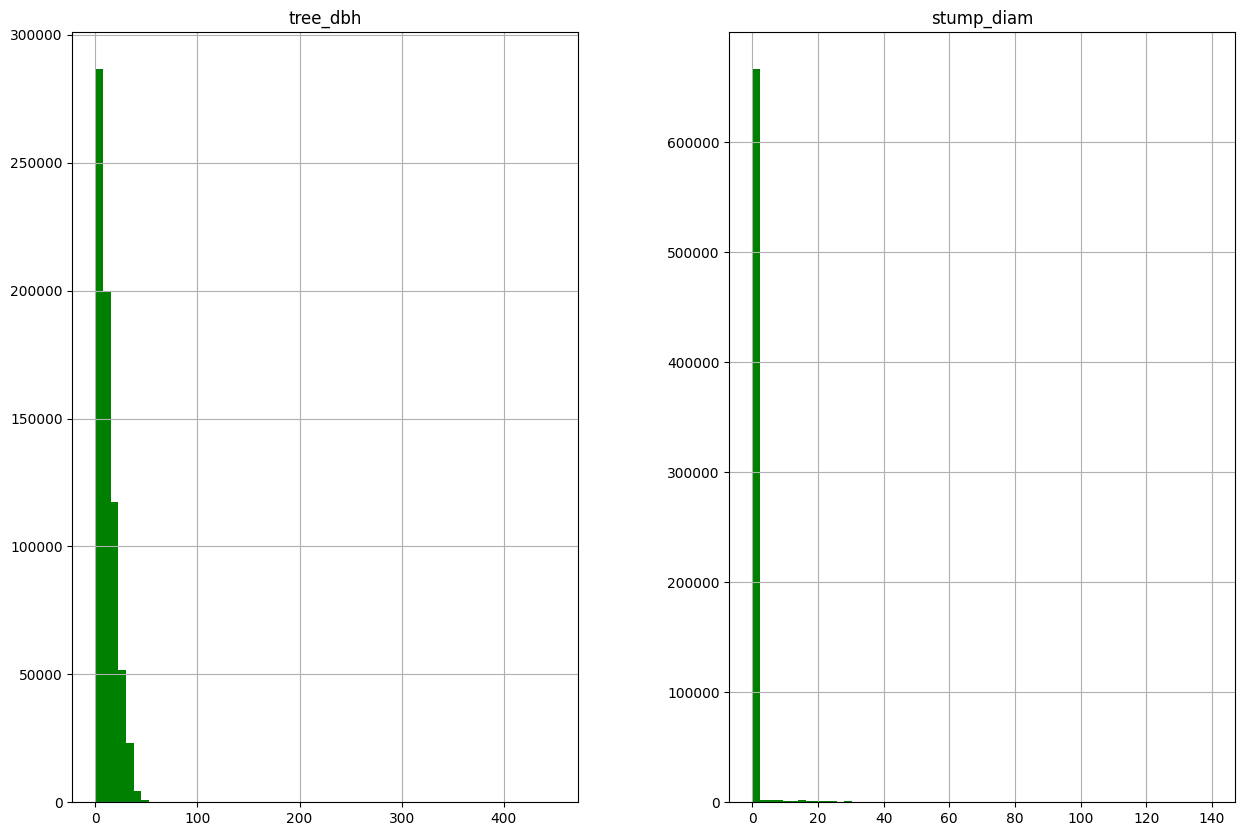

In [11]:
#lets see the distribution of these values
tree_census_subset_new = tree_census_subset.drop(["tree_id"],axis=1)
tree_census_subset_new.hist(bins=60,figsize=(15,10),color="green")
plt.show()

In [12]:
#tree_daiameter around 400 inches looks unreasonable to me
#So lets dive deep into our dataset
big_trees = tree_census_subset[tree_census_subset["tree_dbh"]>50]
big_trees.shape

(364, 19)

There are 211 big trees in our dataset.

In [13]:
#Lets do the same with stump diameter

big_trees_dead = tree_census_subset[tree_census_subset["stump_diam"]>50]
big_trees_dead.shape

(235, 19)

There are 143 dead big trees in our dataset.

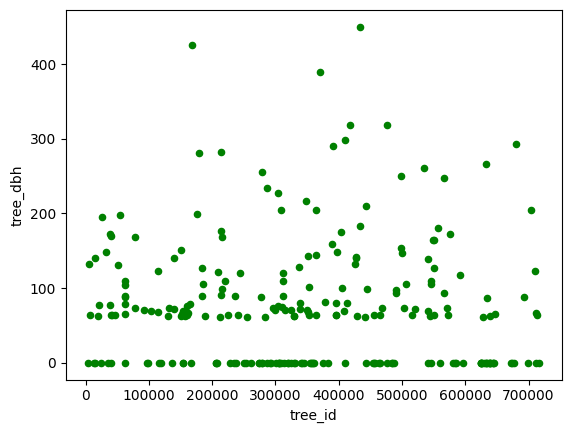

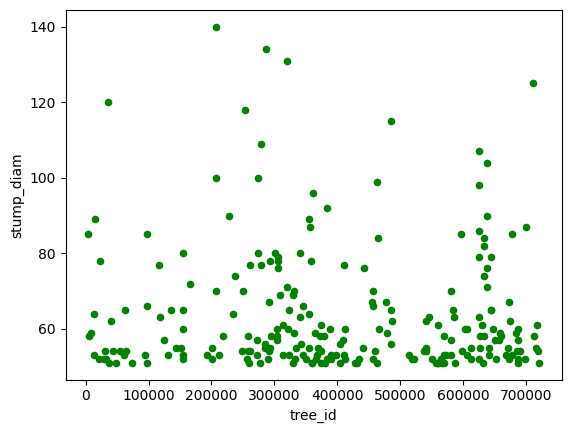

In [51]:
#now lets visualize this and see if there are any outliers

ax1 = big_trees[["tree_id","tree_dbh"]].plot(kind="scatter",x="tree_id",y="tree_dbh",color="green")
ax2 = big_trees_dead[["tree_id","stump_diam"]].plot(kind="scatter",x="tree_id",y="stump_diam",color="green")
plt.show()

Both the scatter plots clearly shows the presence of outliers.

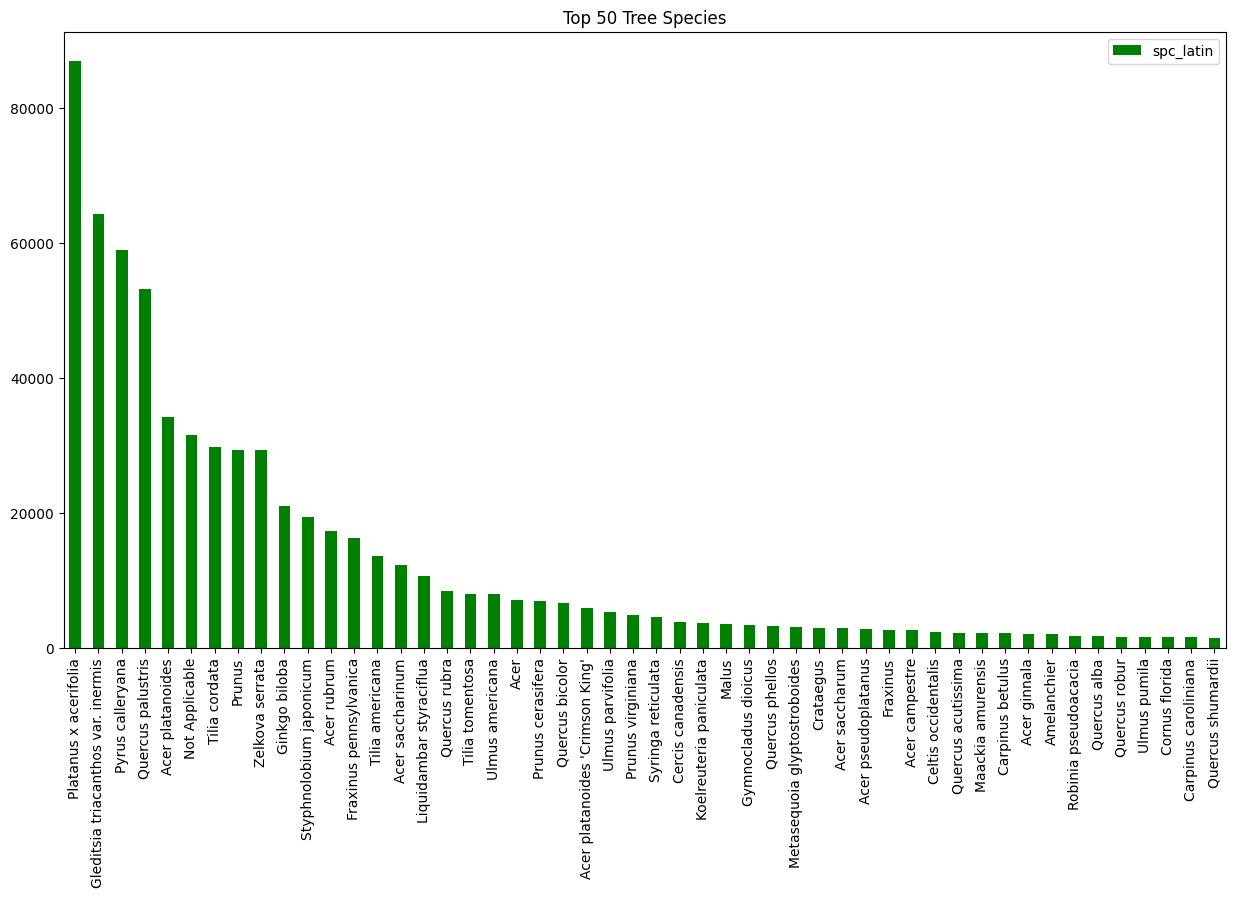

In [48]:
#Now lets see the distribution of trees

pd.DataFrame(tree_census_subset["spc_latin"].value_counts()).head(50).plot(kind="bar",figsize=(15,8),color="green",title="Top 50 Tree Species")
plt.show()

London Plane tree is most common tree, followed by many other trees as seen above.

## **Data Cleaning**

In [18]:
#steward, sidewalk and problem columns have missing value
#now lets look into those columns
tree_census_subset["steward"].value_counts()

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [19]:
tree_census_subset["sidewalk"].value_counts()

NoDamage    464978
Damage      187194
Name: sidewalk, dtype: int64

In [20]:
tree_census_subset["health"].value_counts()

Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64

In [21]:
#lets check if there are any mismatches in our data
stumps = tree_census_subset[tree_census_subset["status"]=="Stump"]
stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


There are no mismatches. For dead trees only stump diameter is recorded as mentioned in the metadata.

In [22]:
#lets see how many dead trees are there
dead = tree_census_subset[tree_census_subset["status"]=="Dead"]
dead


,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


There are 31615 dead or stump trees. So it seems like they have not recorded details like health,problems,steward,spc_latin,sidewalk for them.
Let's fill NaN of these with Not Applicable.

In [23]:
mask = ((tree_census_subset["status"] == "Stump")|(tree_census_subset["status"] == "Dead"))

In [24]:
tree_census_subset.loc[mask] = tree_census_subset.loc[mask].fillna("Not Applicable")
tree_census_subset.loc[tree_census_subset["status"]=="Stump"].head(3)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


Now let us explore data related to tree problems.

In [25]:
tree_problems = tree_census_subset[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_problems.head(3)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No


In [26]:
#lets find the no of Yes and No in each column
tree_problems.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


Root stone which Indicates the presence of a root problem caused by paving stones in tree bed is the most common issue.

In [27]:
#Lets see if there are any more missing values
tree_census_subset.isna().sum()

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
steward        0
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
dtype: int64

In [28]:
#now lets look in to them
tree_census_subset[tree_census_subset["health"].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,None,Damage,None,No,No,No,No,No,No,No,No,No


It is a live tree but health status is not recoreded. So we will fill it with the mode of that column.

In [29]:
tree_census_subset[tree_census_subset["spc_latin"].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
356613,562532,4,0,OnCurb,Alive,Good,NaN,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
427541,630814,11,0,OnCurb,Alive,Poor,NaN,None,Damage,NaN,No,No,No,No,No,No,No,No,No
431417,651014,40,0,OnCurb,Alive,Good,NaN,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
608632,47941,5,0,OnCurb,Alive,Good,NaN,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
656960,150745,3,0,OnCurb,Alive,Good,NaN,1or2,Damage,None,No,No,No,No,No,No,No,No,No


In [30]:
tree_census_subset[tree_census_subset["sidewalk"].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
346299,540677,7,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NaN,None,No,No,No,No,No,No,No,No,No


In [31]:
tree_census_subset.sidewalk.value_counts()

NoDamage          464978
Damage            187194
Not Applicable     31615
Name: sidewalk, dtype: int64

In [32]:
tree_census_subset[tree_census_subset["problems"].isna()].head(4)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
120289,332668,30,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121488,332669,28,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121685,332670,24,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
133470,332693,11,0,OffsetFromCurb,Alive,Good,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No


In [33]:
tree_census_subset.problems.value_counts()

None                                                                          426280
Stones                                                                         95673
Not Applicable                                                                 31615
BranchLights                                                                   29452
Stones,BranchLights                                                            17808
                                                                               ...  
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther         1
Stones,MetalGrates,TrunkLights,TrunkOther                                          1
MetalGrates,RootOther,TrunkLights,BranchLights                                     1
WiresRope,TrunkOther,BranchLights,Sneakers                                         1
MetalGrates,TrunkOther,Sneakers                                                    1
Name: problems, Length: 233, dtype: int64

In [34]:
#fill them with mode

tree_census_subset['health'].fillna('Good',inplace = True)
tree_census_subset['problems'].fillna('None',inplace = True)
tree_census_subset['sidewalk'].fillna('NoDamage',inplace = True)

#lets fill species name with no observation

tree_census_subset['spc_latin'].fillna('No Observation',inplace = True)

tree_census_subset.isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

Finally! Our missing values handling is done.

**Dealing with outliers**

In [35]:
#Lets consider tree diameter above 60 inches and stump diameter above 60 inches as outliers

big_trees = tree_census_subset[(tree_census_subset['tree_dbh']>60) | (tree_census_subset['stump_diam']>60)]
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6466,166008,0,72,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
7042,206818,0,100,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667425,151958,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,None,NoDamage,None,No,No,No,No,No,No,No,No,No
673105,165324,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
674016,184879,105,0,OnCurb,Alive,Fair,Ginkgo biloba,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


There are 245 outliers. In orderto address them we will group the data based on the species and find out the average diameter values.

In [36]:
#inorder to find that lets remove the outlier data from the dataset first and calculate the mean diameter

tree_census_subset = tree_census_subset[(tree_census_subset['tree_dbh']<=60) & (tree_census_subset['stump_diam']<=60)]


In [37]:
#lets create separate dataframe for alive and dead/stump trees

tree_census_subset_alive = tree_census_subset[tree_census_subset["status"] == "Alive"]
tree_census_subset_dead_or_stump = tree_census_subset[(tree_census_subset["status"] == "Dead") | (tree_census_subset["status"] == "Stump")]


In [38]:
status_alive = tree_census_subset_alive.groupby('spc_latin')["tree_dbh"].describe().reset_index()[["spc_latin","25%","75%"]]
status_alive

,spc_latin,25%,75%
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0
...,...,...,...
128,Tsuga canadensis,2.0,7.0
129,Ulmus americana,4.0,17.0
130,Ulmus parvifolia,3.0,10.0
131,Ulmus pumila,4.0,17.0


I am going to megre the above dataframe with tree_census_subset_alive.

In [39]:
#merging

tree_census_subset_alive = tree_census_subset_alive.merge(status_alive , on = "spc_latin", how="left")

Replace the tree diameter which is below the 25% value with 25% and replace those above 75% with 75% value.

In [40]:
#if the tree_dbh < 25% then replace it with 25% value
mask = tree_census_subset_alive['tree_dbh'] < tree_census_subset_alive['25%']
tree_census_subset_alive.loc[mask, "tree_dbh"] = tree_census_subset_alive['25%']


mask = tree_census_subset_alive['tree_dbh'] > tree_census_subset_alive['75%']
tree_census_subset_alive.loc[mask, "tree_dbh"] = tree_census_subset_alive['75%']

In [41]:
tree_census_subset_alive.groupby('spc_latin')["tree_dbh"].describe()

,count,mean,std,min,25%,50%,75%,max
spc_latin,,,,,,,,
Acer,7080.0,10.901130,3.238654,7.0,7.0,11.0,15.0,15.0
Acer buergerianum,110.0,7.527273,2.057473,5.0,5.0,8.0,10.0,10.0
Acer campestre,2549.0,6.409180,2.073060,4.0,4.0,6.0,9.0,9.0
Acer ginnala,2049.0,7.076623,2.440200,4.0,4.0,7.0,10.0,10.0
Acer griseum,220.0,2.454545,0.499065,2.0,2.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...
Tsuga canadensis,88.0,4.227273,2.032649,2.0,2.0,3.5,7.0,7.0
Ulmus americana,7972.0,10.110637,5.370087,4.0,4.0,9.0,17.0,17.0
Ulmus parvifolia,5344.0,6.147455,2.781917,3.0,3.0,5.0,10.0,10.0


So we have removed the outliers in our data. We could handle the missing values and outlier issue even without dropping the rows.

Now our clean data is ready for further analysis.